In [3]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder

In [4]:
master_path = "master_crash.csv"

df_master = pd.read_csv(master_path)

In [5]:
df_master

,Unnamed: 0,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,AVERAGE_DRIVER_SEX,STATUS_L,STATUS_U,STATUS_P,NUM_VEHICLES,AVERAGE_YEAR
0,0,2021-09-11,09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,...,['Parked'],['Left Rear Quarter Panel'],['Left Rear Quarter Panel'],[1],1.0,1,0,0,1,2018.0
1,1,2021-12-14,08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",2.0,0.0,...,"['Going Straight Ahead', 'Going Straight Ahead']","['Center Front End', 'Right Front Quarter Panel']","['Center Front End', 'Right Front Quarter Panel']","[1, 1]",0.5,1,0,0,2,2010.0
2,2,2021-12-14,14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",0.0,0.0,...,"['Changing Lanes', 'Going Straight Ahead']","['Left Rear Bumper', 'Right Front Bumper']","['Left Rear Bumper', 'Right Front Bumper']","[1, 1]",0.0,1,1,0,2,2009.0
3,3,2021-12-14,16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",0.0,0.0,...,"['Going Straight Ahead', 'Making Right Turn']","['Left Front Quarter Panel', 'Right Side Doors']","['Left Front Quarter Panel', 'Right Side Doors']","[1, 1]",0.5,1,0,0,2,2019.5
4,4,2021-12-14,23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",2.0,0.0,...,"['Going Straight Ahead', 'Going Straight Ahead']","['Center Front End', 'Center Front End']","['Demolished', 'Other']","[1, 1]",0.5,1,0,0,2,2013.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,628347,2024-02-23,12:38:00,BRONX,10459,40.820972,-73.892845,"(40.820972, -73.892845)",0.0,0.0,...,['Going Straight Ahead'],['Right Front Bumper'],['Left Front Bumper'],[1],0.0,1,0,0,1,2004.0
628348,628348,2024-02-25,08:25:00,BROOKLYN,11211,40.706276,-73.955060,"(40.706276, -73.95506)",0.0,0.0,...,"['Parked', 'Parked']","['Center Back End', 'Left Rear Bumper']","['Center Back End', 'Left Rear Bumper']","[1, 1]",0.0,1,0,0,2,2021.0
628349,628349,2024-02-25,14:50:00,QUEENS,11370,40.773808,-73.892900,"(40.773808, -73.8929)",2.0,0.0,...,"['Going Straight Ahead', 'Making Left Turn']","['Center Front End', 'Right Front Quarter Panel']","['Center Front End', 'Right Front Bumper']","[1, 1]",0.5,1,0,0,2,2010.5
628350,628350,2024-02-21,12:00:00,BROOKLYN,11207,40.657660,-73.897050,"(40.65766, -73.89705)",0.0,0.0,...,['Parked'],['Left Front Bumper'],['Left Front Quarter Panel'],[1],1.0,1,0,0,1,2029.0


In [6]:
df_master.columns

Index(['Unnamed: 0', 'CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'LARGE_VEHICLE', 'TWO_WHEEL_VEHICLE',
       'PERSON_TYPE', 'PERSON_INJURY', 'PERSON_AGE', 'EJECTION',
       'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_ROLE', 'PERSON_SEX',
       'AVERAGE_AGE', 'AVERAGE_SEX', 'PED_PRESENT', 'CYC_PRESENT', 'EJECTED',
       'NUM_PEOPLE', 'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE',
       'VEHICLE_YEAR', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE',
       'AVERAGE_DRIVER_SEX', 'STATUS_L', 'STATUS_U', 'STATUS_P',
       'NUM_VEHICLES', 'AVERAGE_YEAR'],
      dtype='object')

In [7]:
def label_output(row):
    if 'Killed' in row['PERSON_INJURY']:
        return 'Killed'
    elif 'Injured' in row['PERSON_INJURY']:
        return 'Injured'
    else:
        return 'Unspecified'

In [8]:
def label_output2(row):
    if row['NUMBER OF PERSONS KILLED'] >= 1:
        return 'Killed'
    elif row['NUMBER OF PERSONS INJURED'] >= 1:
        return 'Injured'
    else: 
        return 'Unspecified'

In [9]:
df_master['OUTPUT'] = df_master.apply(label_output, axis=1)
df_master

,Unnamed: 0,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,AVERAGE_DRIVER_SEX,STATUS_L,STATUS_U,STATUS_P,NUM_VEHICLES,AVERAGE_YEAR,OUTPUT
0,0,2021-09-11,09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,...,['Left Rear Quarter Panel'],['Left Rear Quarter Panel'],[1],1.0,1,0,0,1,2018.0,Unspecified
1,1,2021-12-14,08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",2.0,0.0,...,"['Center Front End', 'Right Front Quarter Panel']","['Center Front End', 'Right Front Quarter Panel']","[1, 1]",0.5,1,0,0,2,2010.0,Injured
2,2,2021-12-14,14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",0.0,0.0,...,"['Left Rear Bumper', 'Right Front Bumper']","['Left Rear Bumper', 'Right Front Bumper']","[1, 1]",0.0,1,1,0,2,2009.0,Unspecified
3,3,2021-12-14,16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",0.0,0.0,...,"['Left Front Quarter Panel', 'Right Side Doors']","['Left Front Quarter Panel', 'Right Side Doors']","[1, 1]",0.5,1,0,0,2,2019.5,Unspecified
4,4,2021-12-14,23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",2.0,0.0,...,"['Center Front End', 'Center Front End']","['Demolished', 'Other']","[1, 1]",0.5,1,0,0,2,2013.5,Injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,628347,2024-02-23,12:38:00,BRONX,10459,40.820972,-73.892845,"(40.820972, -73.892845)",0.0,0.0,...,['Right Front Bumper'],['Left Front Bumper'],[1],0.0,1,0,0,1,2004.0,Unspecified
628348,628348,2024-02-25,08:25:00,BROOKLYN,11211,40.706276,-73.955060,"(40.706276, -73.95506)",0.0,0.0,...,"['Center Back End', 'Left Rear Bumper']","['Center Back End', 'Left Rear Bumper']","[1, 1]",0.0,1,0,0,2,2021.0,Unspecified
628349,628349,2024-02-25,14:50:00,QUEENS,11370,40.773808,-73.892900,"(40.773808, -73.8929)",2.0,0.0,...,"['Center Front End', 'Right Front Quarter Panel']","['Center Front End', 'Right Front Bumper']","[1, 1]",0.5,1,0,0,2,2010.5,Injured
628350,628350,2024-02-21,12:00:00,BROOKLYN,11207,40.657660,-73.897050,"(40.65766, -73.89705)",0.0,0.0,...,['Left Front Bumper'],['Left Front Quarter Panel'],[1],1.0,1,0,0,1,2029.0,Unspecified


In [10]:
df_master['OUTPUT2'] = df_master.apply(label_output2, axis=1)
df_master

,Unnamed: 0,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,AVERAGE_DRIVER_SEX,STATUS_L,STATUS_U,STATUS_P,NUM_VEHICLES,AVERAGE_YEAR,OUTPUT,OUTPUT2
0,0,2021-09-11,09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,...,['Left Rear Quarter Panel'],[1],1.0,1,0,0,1,2018.0,Unspecified,Unspecified
1,1,2021-12-14,08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",2.0,0.0,...,"['Center Front End', 'Right Front Quarter Panel']","[1, 1]",0.5,1,0,0,2,2010.0,Injured,Injured
2,2,2021-12-14,14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",0.0,0.0,...,"['Left Rear Bumper', 'Right Front Bumper']","[1, 1]",0.0,1,1,0,2,2009.0,Unspecified,Unspecified
3,3,2021-12-14,16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",0.0,0.0,...,"['Left Front Quarter Panel', 'Right Side Doors']","[1, 1]",0.5,1,0,0,2,2019.5,Unspecified,Unspecified
4,4,2021-12-14,23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",2.0,0.0,...,"['Demolished', 'Other']","[1, 1]",0.5,1,0,0,2,2013.5,Injured,Injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,628347,2024-02-23,12:38:00,BRONX,10459,40.820972,-73.892845,"(40.820972, -73.892845)",0.0,0.0,...,['Left Front Bumper'],[1],0.0,1,0,0,1,2004.0,Unspecified,Unspecified
628348,628348,2024-02-25,08:25:00,BROOKLYN,11211,40.706276,-73.955060,"(40.706276, -73.95506)",0.0,0.0,...,"['Center Back End', 'Left Rear Bumper']","[1, 1]",0.0,1,0,0,2,2021.0,Unspecified,Unspecified
628349,628349,2024-02-25,14:50:00,QUEENS,11370,40.773808,-73.892900,"(40.773808, -73.8929)",2.0,0.0,...,"['Center Front End', 'Right Front Bumper']","[1, 1]",0.5,1,0,0,2,2010.5,Injured,Injured
628350,628350,2024-02-21,12:00:00,BROOKLYN,11207,40.657660,-73.897050,"(40.65766, -73.89705)",0.0,0.0,...,['Left Front Quarter Panel'],[1],1.0,1,0,0,1,2029.0,Unspecified,Unspecified


In [11]:
df_master['OUTPUT'].value_counts(dropna=False)

OUTPUT
Unspecified    466472
Injured        161065
Killed            815
Name: count, dtype: int64

In [12]:
df_master['OUTPUT2'].value_counts(dropna=False)

OUTPUT2
Unspecified    464916
Injured        162611
Killed            825
Name: count, dtype: int64

In [13]:
df_master

,Unnamed: 0,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,AVERAGE_DRIVER_SEX,STATUS_L,STATUS_U,STATUS_P,NUM_VEHICLES,AVERAGE_YEAR,OUTPUT,OUTPUT2
0,0,2021-09-11,09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,...,['Left Rear Quarter Panel'],[1],1.0,1,0,0,1,2018.0,Unspecified,Unspecified
1,1,2021-12-14,08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",2.0,0.0,...,"['Center Front End', 'Right Front Quarter Panel']","[1, 1]",0.5,1,0,0,2,2010.0,Injured,Injured
2,2,2021-12-14,14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",0.0,0.0,...,"['Left Rear Bumper', 'Right Front Bumper']","[1, 1]",0.0,1,1,0,2,2009.0,Unspecified,Unspecified
3,3,2021-12-14,16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",0.0,0.0,...,"['Left Front Quarter Panel', 'Right Side Doors']","[1, 1]",0.5,1,0,0,2,2019.5,Unspecified,Unspecified
4,4,2021-12-14,23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",2.0,0.0,...,"['Demolished', 'Other']","[1, 1]",0.5,1,0,0,2,2013.5,Injured,Injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,628347,2024-02-23,12:38:00,BRONX,10459,40.820972,-73.892845,"(40.820972, -73.892845)",0.0,0.0,...,['Left Front Bumper'],[1],0.0,1,0,0,1,2004.0,Unspecified,Unspecified
628348,628348,2024-02-25,08:25:00,BROOKLYN,11211,40.706276,-73.955060,"(40.706276, -73.95506)",0.0,0.0,...,"['Center Back End', 'Left Rear Bumper']","[1, 1]",0.0,1,0,0,2,2021.0,Unspecified,Unspecified
628349,628349,2024-02-25,14:50:00,QUEENS,11370,40.773808,-73.892900,"(40.773808, -73.8929)",2.0,0.0,...,"['Center Front End', 'Right Front Bumper']","[1, 1]",0.5,1,0,0,2,2010.5,Injured,Injured
628350,628350,2024-02-21,12:00:00,BROOKLYN,11207,40.657660,-73.897050,"(40.65766, -73.89705)",0.0,0.0,...,['Left Front Quarter Panel'],[1],1.0,1,0,0,1,2029.0,Unspecified,Unspecified


In [14]:
df_master.columns

Index(['Unnamed: 0', 'CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'LARGE_VEHICLE', 'TWO_WHEEL_VEHICLE',
       'PERSON_TYPE', 'PERSON_INJURY', 'PERSON_AGE', 'EJECTION',
       'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_ROLE', 'PERSON_SEX',
       'AVERAGE_AGE', 'AVERAGE_SEX', 'PED_PRESENT', 'CYC_PRESENT', 'EJECTED',
       'NUM_PEOPLE', 'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE',
       'VEHICLE_YEAR', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE',
       'AVERAGE_DRIVER_SEX', 'STATUS_L', 'STATUS_U', 'STATUS_P',
       'NUM_VEHICLES', 'AVERAGE_YEAR', 'OUTPUT', 'OUTPUT2'],
      dtype='obj

In [15]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [16]:
df_master['CRASH_TIME'] = pd.to_datetime(df_master['CRASH_TIME'], format='%H:%M:%S').dt.time
df_master['TIME'] = df_master['CRASH_TIME'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


cols_not_encoded = ['CRASH_DATE', 'CRASH_TIME', 'TIME', 'LATITUDE', 'LONGITUDE', 'AVERAGE_AGE', 'PED_PRESENT', 'CYC_PRESENT', 'EJECTED', 'UNSAFE_COND', 
                    'LARGE_VEHICLE', 'TWO_WHEEL_VEHICLE', 'AVERAGE_SEX', 'AVERAGE_DRIVER_SEX', 'STATUS_L', 'STATUS_U', 'STATUS_P', 'NUM_VEHICLES', 'AVERAGE_YEAR']

cols_encoded = df_master.columns.difference(cols_not_encoded).tolist()

encoded_df_master = df_master.copy()

encoded_df_master[cols_encoded] = oe.fit_transform(df_master[cols_encoded])

In [17]:
encoded_df_master

,Unnamed: 0,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,PUBLIC_PROPERTY_DAMAGE,AVERAGE_DRIVER_SEX,STATUS_L,STATUS_U,STATUS_P,NUM_VEHICLES,AVERAGE_YEAR,OUTPUT,OUTPUT2,TIME
0,0.0,2021-09-11,09:35:00,1.0,139.0,40.667202,-73.866500,43289.0,0.0,0.0,...,21.0,1.0,1,0,0,1,2018.0,2.0,2.0,34500
1,1.0,2021-12-14,08:17:00,0.0,121.0,40.868160,-73.831480,153781.0,2.0,0.0,...,20.0,0.5,1,0,0,2,2010.0,0.0,0.0,29820
2,2.0,2021-12-14,14:58:00,2.0,14.0,40.751440,-73.973970,108565.0,0.0,0.0,...,20.0,0.0,1,1,0,2,2009.0,2.0,2.0,53880
3,3.0,2021-12-14,16:50:00,3.0,202.0,40.675884,-73.755770,50164.0,0.0,0.0,...,20.0,0.5,1,0,0,2,2019.5,2.0,2.0,60600
4,4.0,2021-12-14,23:10:00,3.0,220.0,40.666840,-73.789410,43007.0,2.0,0.0,...,20.0,0.5,1,0,0,2,2013.5,0.0,0.0,83400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628347,628347.0,2024-02-23,12:38:00,0.0,105.0,40.820972,-73.892845,136397.0,0.0,0.0,...,21.0,0.0,1,0,0,1,2004.0,2.0,2.0,45480
628348,628348.0,2024-02-25,08:25:00,1.0,142.0,40.706276,-73.955060,74429.0,0.0,0.0,...,20.0,0.0,1,0,0,2,2021.0,2.0,2.0,30300
628349,628349.0,2024-02-25,14:50:00,3.0,190.0,40.773808,-73.892900,123527.0,2.0,0.0,...,20.0,0.5,1,0,0,2,2010.5,0.0,0.0,53400
628350,628350.0,2024-02-21,12:00:00,1.0,138.0,40.657660,-73.897050,37057.0,0.0,0.0,...,21.0,1.0,1,0,0,1,2029.0,2.0,2.0,43200


In [18]:
encoded_df_master.columns

Index(['Unnamed: 0', 'CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'LARGE_VEHICLE', 'TWO_WHEEL_VEHICLE',
       'PERSON_TYPE', 'PERSON_INJURY', 'PERSON_AGE', 'EJECTION',
       'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_ROLE', 'PERSON_SEX',
       'AVERAGE_AGE', 'AVERAGE_SEX', 'PED_PRESENT', 'CYC_PRESENT', 'EJECTED',
       'NUM_PEOPLE', 'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE',
       'VEHICLE_YEAR', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE',
       'AVERAGE_DRIVER_SEX', 'STATUS_L', 'STATUS_U', 'STATUS_P',
       'NUM_VEHICLES', 'AVERAGE_YEAR', 'OUTPUT', 'OUTPUT2', 'TIME'],
      dt

# Possible Extra Cleaning
- Turns Person_Type / PED ROLE to whether it contains a pedestrian or not and then if there was a cyclist or not
- Turns AGE into average age of those involved?
- Ejection just is whether someone was ejected or not at all
- 

In [19]:
# ML 2 - Decision Tree Classifier

In [20]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
encoded_df_master['OUTPUT2'].value_counts()

OUTPUT2
2.0    464916
0.0    162611
1.0       825
Name: count, dtype: int64

## Non-Information Rate: 0.74

- Unspecified = 0.7412
- Injured = 0.2574
- Killed = 0.0013

In [22]:
encoded_df_master.columns

Index(['Unnamed: 0', 'CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'LARGE_VEHICLE', 'TWO_WHEEL_VEHICLE',
       'PERSON_TYPE', 'PERSON_INJURY', 'PERSON_AGE', 'EJECTION',
       'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_ROLE', 'PERSON_SEX',
       'AVERAGE_AGE', 'AVERAGE_SEX', 'PED_PRESENT', 'CYC_PRESENT', 'EJECTED',
       'NUM_PEOPLE', 'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE',
       'VEHICLE_YEAR', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE',
       'AVERAGE_DRIVER_SEX', 'STATUS_L', 'STATUS_U', 'STATUS_P',
       'NUM_VEHICLES', 'AVERAGE_YEAR', 'OUTPUT', 'OUTPUT2', 'TIME'],
      dt

In [23]:
remove_cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'PERSON_INJURY', 'OUTPUT', 'OUTPUT2', 'COLLISION_ID', 'EJECTION', 'PERSON_AGE', 'PERSON_TYPE', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
               'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'CRASH_TIME', 'CRASH_DATE', 'PERSON_SEX', 'PED_ROLE', 'VEHICLE_YEAR', 'Unnamed: 0']

X_train, X_test, y_train, y_test = train_test_split(encoded_df_master.drop(remove_cols, axis=1), encoded_df_master['OUTPUT2'], test_size=0.2, random_state=42, stratify=encoded_df_master['OUTPUT2'])

X_train

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,LARGE_VEHICLE,TWO_WHEEL_VEHICLE,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,AVERAGE_AGE,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,AVERAGE_DRIVER_SEX,STATUS_L,STATUS_U,STATUS_P,NUM_VEHICLES,AVERAGE_YEAR,TIME
4940,1.0,164.0,40.605530,-73.929170,11620.0,0,0,3673.0,728.0,35.400000,...,906.0,947.0,20.0,0.5,1,0,0,2,2009.5,52920
291634,3.0,126.0,40.744730,-73.933590,103244.0,0,0,5115.0,3256.0,53.333333,...,1030.0,1343.0,21.0,0.0,1,0,0,1,2004.0,45000
199019,1.0,158.0,40.622013,-74.016410,18738.0,0,0,3654.0,2337.0,34.833333,...,900.0,940.0,20.0,1.0,1,0,0,2,2008.5,68700
248372,3.0,207.0,40.697205,-73.827194,67530.0,0,0,5117.0,2518.0,26.000000,...,1179.0,1249.0,21.0,0.0,1,0,0,1,2016.0,66000
439516,1.0,144.0,40.673256,-73.930700,48069.0,0,0,5115.0,2516.0,28.333333,...,1309.0,1398.0,21.0,0.0,1,0,0,1,2017.0,81900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613546,3.0,203.0,40.672790,-73.856920,47700.0,0,0,4311.0,2453.0,35.000000,...,1342.0,1432.0,20.0,0.0,1,0,0,2,2013.0,48900
590233,3.0,209.0,40.680256,-73.815210,54367.0,0,0,4959.0,2384.0,49.000000,...,1179.0,1249.0,21.0,0.0,1,0,0,1,2016.0,79380
370731,1.0,150.0,40.625984,-74.001526,20567.0,0,0,5117.0,2518.0,19.000000,...,1110.0,1360.0,21.0,0.0,1,0,0,1,2009.0,24600
299461,0.0,100.0,40.808132,-73.910020,131398.0,0,0,5117.0,2518.0,59.000000,...,393.0,1343.0,21.0,0.0,1,0,0,1,2017.0,62100


In [24]:
dtree = DecisionTreeClassifier(random_state=42, 
                               max_depth=4
                               )

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
test_acc = dtree.score(X_test, y_test)

print(test_acc)

0.8221467164262241


In [26]:
y_pred = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report: ')
print(class_report)

Confusion Matrix: 
[[12014     2 20506]
 [  126     0    39]
 [ 1678     0 91306]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.37      0.52     32522
         1.0       0.00      0.00      0.00       165
         2.0       0.82      0.98      0.89     92984

    accuracy                           0.82    125671
   macro avg       0.56      0.45      0.47    125671
weighted avg       0.83      0.82      0.79    125671



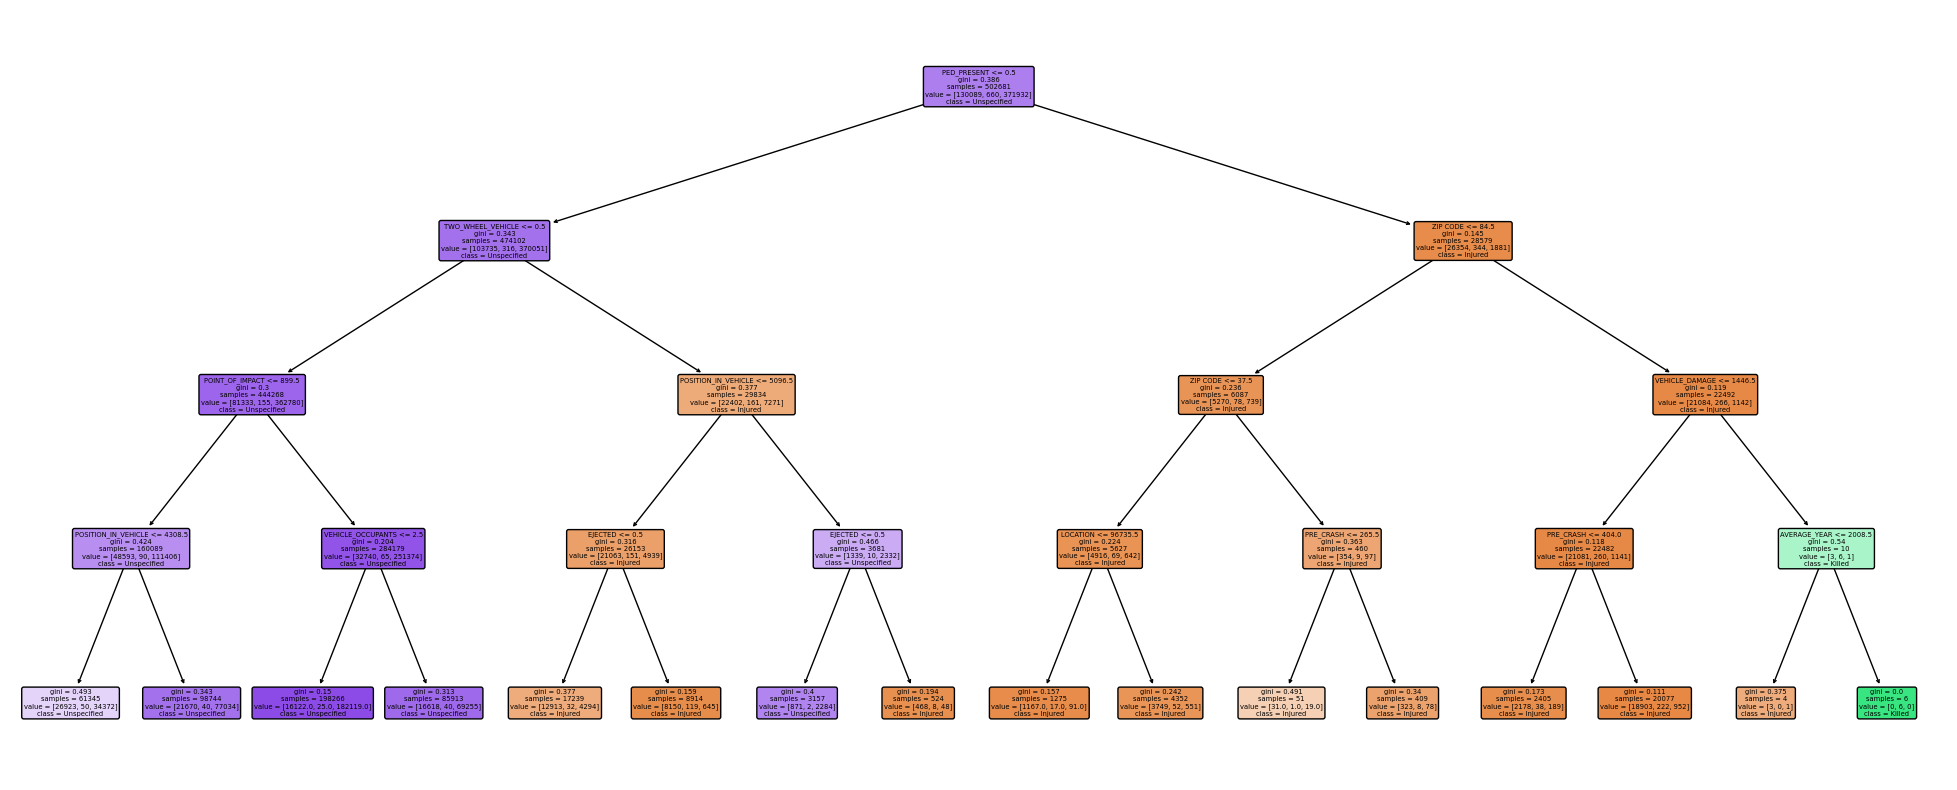

In [27]:
plt.figure(figsize=(25,10))
plot_tree(dtree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['Injured', 'Killed', 'Unspecified'])
plt.show()

In [28]:
# Above doesn't really tell us much as it classified 0 as killed, so lets make it more sensitive

dtree2 = DecisionTreeClassifier(random_state=42,
    max_depth = 5, 
    class_weight='balanced'
)

dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [29]:
test_acc = dtree2.score(X_test, y_test)

print(test_acc)

0.7552339044011745


In [30]:
y_pred = dtree2.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report: ')
print(class_report)

Confusion Matrix: 
[[12907  5901 13714]
 [   36   112    17]
 [10037  1055 81892]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.56      0.40      0.47     32522
         1.0       0.02      0.68      0.03       165
         2.0       0.86      0.88      0.87     92984

    accuracy                           0.76    125671
   macro avg       0.48      0.65      0.45    125671
weighted avg       0.78      0.76      0.76    125671



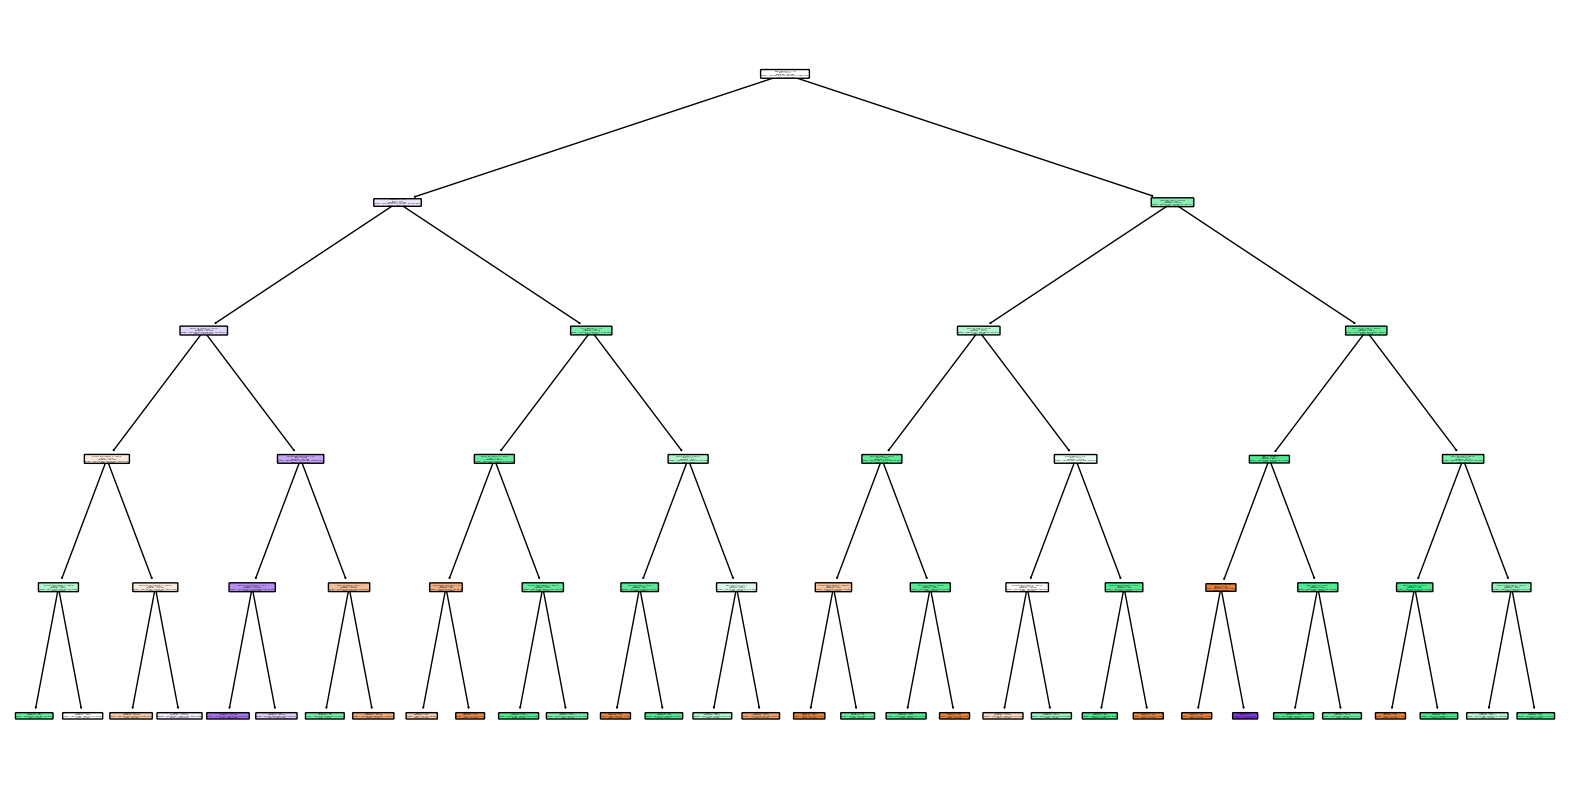

In [31]:
plt.figure(figsize=(20,10))
plot_tree(dtree2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['Injured', 'Killed', 'Unspecified'])
plt.show()

In [32]:
from sklearn.tree import export_text

tree_text = export_text(dtree2, feature_names=X_train.columns)

print(tree_text)

|--- PED_PRESENT <= 0.50
|   |--- EJECTED <= 0.50
|   |   |--- POINT_OF_IMPACT <= 899.50
|   |   |   |--- SAFETY_EQUIPMENT <= 894.50
|   |   |   |   |--- SAFETY_EQUIPMENT <= 253.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- SAFETY_EQUIPMENT >  253.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- SAFETY_EQUIPMENT >  894.50
|   |   |   |   |--- POSITION_IN_VEHICLE <= 4308.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- POSITION_IN_VEHICLE >  4308.50
|   |   |   |   |   |--- class: 2.0
|   |   |--- POINT_OF_IMPACT >  899.50
|   |   |   |--- TWO_WHEEL_VEHICLE <= 0.50
|   |   |   |   |--- VEHICLE_OCCUPANTS <= 2.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- VEHICLE_OCCUPANTS >  2.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- TWO_WHEEL_VEHICLE >  0.50
|   |   |   |   |--- VEHICLE_TYPE <= 581.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- VEHICLE_TYPE >  581.00
|   |   |   |   |   |--- class: 0.0
|   |--- EJECTED >  0.50
|  

In [33]:
# ML 3

In [55]:
X_train.columns

Index(['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'LARGE_VEHICLE',
       'TWO_WHEEL_VEHICLE', 'PERSON_TYPE', 'PERSON_AGE', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_ROLE', 'PERSON_SEX', 'AVERAGE_AGE',
       'AVERAGE_SEX', 'PED_PRESENT', 'CYC_PRESENT', 'EJECTED', 'NUM_PEOPLE',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_YEAR',
       'VEHICLE_OCCUPANTS', 'DRIVER_SEX', 'DRIVER_LICENSE_STATUS',
       'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH', 'POINT_OF_IMPACT',
       'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE', 'AVERAGE_DRIVER_SEX',
       'STATUS_L', 'STATUS_U', 'STATUS_P', 'NUM_VEHICLES', 'AVERAGE_YEAR',
       'TIME'],
      dtype='object')

In [72]:
from sklearn.ensemble import RandomForestClassifier

remove_cols2 = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'PERSON_INJURY', 'OUTPUT', 'OUTPUT2', 'COLLISION_ID', 'CRASH_TIME', 'CRASH_DATE', 'Unnamed: 0', 'LOCATION', 'EJECTION', 'PERSON_AGE', 'DRIVER_SEX', 'PERSON_TYPE', 'PED_ROLE']

X = encoded_df_master.drop(remove_cols2, axis=1)
y = encoded_df_master['OUTPUT2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [65]:
tree = RandomForestClassifier(n_estimators=100, random_state=123)

tree.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [66]:
pred = tree.predict(X_test)

In [67]:
acc = accuracy_score(y_test, pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8341007713282336


In [68]:
feature_names = X_train.columns
importances = tree.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
15,PED_PRESENT,0.104730
36,TIME,0.048939
3,LONGITUDE,0.048854
2,LATITUDE,0.048721
27,POINT_OF_IMPACT,0.047806
10,POSITION_IN_VEHICLE,0.046753
13,AVERAGE_AGE,0.046333
9,TWO_WHEEL_VEHICLE,0.044959
28,VEHICLE_DAMAGE,0.044722
11,SAFETY_EQUIPMENT,0.041422


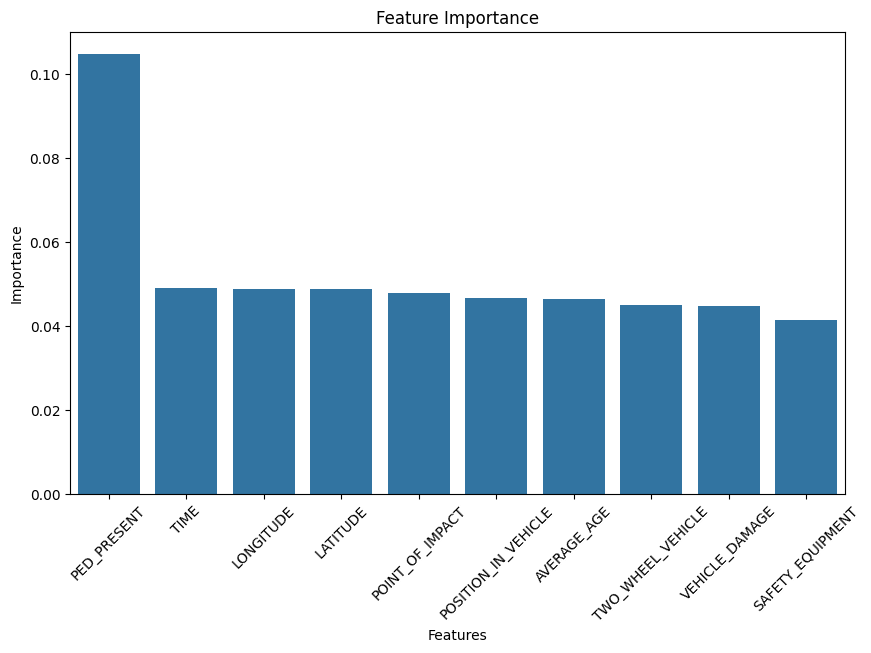

In [71]:
plt.figure(figsize=(10,6))
top_feat = feature_importance_df.head(10)
bar_plot = sns.barplot(x='Feature', y='Importance', data=top_feat)

plt.xticks(rotation=45)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

plt.show()

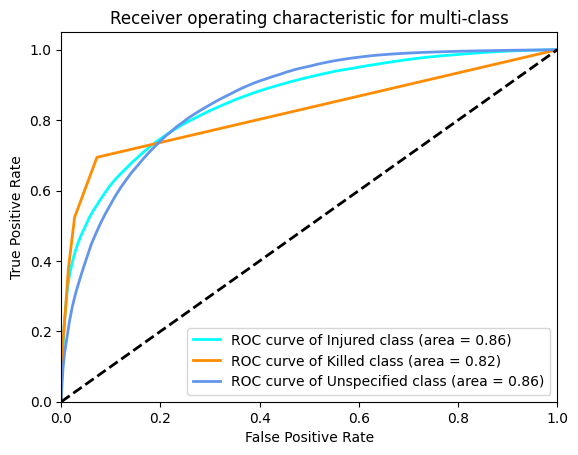

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

pred = tree.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
clas = ['Injured', 'Killed', 'Unspecified']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} class (area = {1:0.2f})'.format(clas[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

In [73]:
from sklearn.model_selection import cross_val_score

cross_scores = cross_val_score(tree, X, y, cv=5)

print("Accuracy scores for each fold:", cross_scores)
print("Mean cross-validation score:", cross_scores.mean())

Accuracy scores for each fold: [0.8238257  0.83613562 0.83400175 0.83400175 0.73843399]
Mean cross-validation score: 0.8132797645240271
